In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import csv
from scipy.stats import entropy


In [6]:
tfidf_path = '../../data/tfidf_merged_chs_202001_full/'

In [7]:
lda_path= '../../data/lda_merged_chs_202001_full/'

In [8]:
fandom_list = ['harry_potter',
 'dcu',
 'doctor_who_&_related_fandoms',
 'star_wars_all_media_types',
 'arthurian_mythology_&_related_fandoms',
 'supernatural',
 'haikyuu',
 'kuroko_no_basuke',
 'hamilton_miranda',
 'dragon_age_all_media_types',
 'the_walking_dead_&_related_fandoms',
 'buffy_the_vampire_slayer',
 'les_miserables_all_media_types',
 'naruto',
 'tolkien_j_r_r_works_&_related_fandoms',
 'shakespare_william_works',
 'hetalia_axis_powers',
 'attack_on_titan',
 'ms_paint_adventures',
 'marvel',
 'bishoujo_senshi_sailor_moon',
 'one_direction',
 'sherlock_holmes_&_related_fandoms']

In [10]:
df_all = []
for i,fandom in enumerate(fandom_list):
    df_tfidf = pd.read_csv(os.path.join(tfidf_path,fandom + '_temporal_tfidf_cos_merged_chapters_full.tsv'), \
                           sep = '\t',  quoting=csv.QUOTE_NONE)
    del df_tfidf['index']
    df_lda = pd.read_csv(os.path.join(lda_path,fandom + '_temporal_lda_jsd_toprev_with_dist_merged_chs_no_text.tsv'),\
                         sep = '\t',  quoting=csv.QUOTE_NONE)
#     df['Topic_entropy'] = df.apply(lambda row: entropy(eval(row['Dist'])), axis=1)

    del df_lda['index']
    df_tfidf = df_tfidf.astype('object')
    df_lda = df_lda.astype('object')

    #     df_tfidf['Chapters'] = df_tfidf.astype('object')
    df = pd.merge(df_tfidf, df_lda, on=['AdditionalTags', 'ArchiveWarnings', 'Author', 'Bookmarks', 'Category',\
 'Chapters' ,'Characters','Comments' ,'CompleteDate',\
 'Fandoms', 'Hits' ,'Kudos', 'Language' ,'PublishDate' ,'Rating',\
 'Relationship','Title' ,'URL' ,'UpdateDate' ,'Words'], how='inner')

    df = df.replace([np.inf, -np.inf], np.nan)
    df['Hits'].fillna(0, inplace=True)
    df['Kudos'].fillna(0, inplace=True)
    df['Bookmarks'].fillna(0, inplace=True)
    df['Comments'].fillna(0, inplace=True)

    df_all.append(df)

In [11]:
df_all = pd.concat(df_all)

In [12]:
len(df_all)

440971

In [13]:
df_all.head()

,AdditionalTags,ArchiveWarnings,Author,Bookmarks,Category,Chapters,Characters,Fandoms,Hits,Kudos,...,Words,PublishDate,UpdateDate,CompleteDate,Comments,URL,Cos,Entropy,Dist,JSD
0,"Afterlife, Humor, Friendship, Friendship/Love",No Archive Warnings Apply,crossingwinter,21,F/MGen,24,"Ariana Dumbledore, Gideon Prewett, Fabian Prew...",['Harry Potter - J. K. Rowling'],2399.0,53.0,...,66258.0,2009-07-16,NaN,2009-07-16,16,http://archiveofourown.org/works/488677/chapte...,0.603058,5.315078,"[0.000955473, 0.008187229, 0.0005799397, 0.001...",0.196381
1,"Alternate Universe, Suicide","Major Character Death, Rape/Non-Con",Batsutousai,7,F/MM/M,1,"Harry Potter, Voldemort, Ron Weasley",['Harry Potter - J. K. Rowling'],2333.0,80.0,...,3542.0,2009-07-11,NaN,2009-07-11,3,http://archiveofourown.org/works/208853?view_a...,0.452716,5.723015,"[3.522977e-05, 1.2239097e-05, 0.16778131, 0.00...",0.245605
2,"Alzheimer\'s Disease, Angst",No Archive Warnings Apply,thesewarmstars,1,GenM/M,1,"Albus Dumbledore, Severus Snape",['Harry Potter - J. K. Rowling'],200.0,21.0,...,837.0,2009-07-09,NaN,2009-07-09,0,http://archiveofourown.org/works/1644146,0.502372,4.662854,"[4.768298e-05, 0.04789152, 4.768298e-05, 4.768...",0.391960
3,"Amnesia, Temporary Amnesia, Spells & Enchantme...",No Archive Warnings Apply,EntreNous,14,M/M,2,"Ron Weasley, Draco Malfoy, Harry Potter, Hermi...",['Harry Potter - Fandom'],1635.0,115.0,...,15774.0,2009-07-07,NaN,2009-07-07,4,http://archiveofourown.org/works/967862/chapte...,0.367911,5.718597,"[3.1658487e-06, 0.03745789, 0.029170686, 4.085...",0.103724
4,"Anal Sex, Bottom Snape, Crack, Virgin Snape",No Archive Warnings Apply,thesewarmstars,5,M/M,1,"Harry Potter, Severus Snape",['Harry Potter - J. K. Rowling'],2560.0,103.0,...,781.0,2009-07-20,NaN,2009-07-20,3,http://archiveofourown.org/works/1649069?view_...,0.431102,5.080830,"[5.686052e-05, 0.06450863, 0.005470241, 5.6860...",0.260273


Text(0.5, 0, 'Kudos')

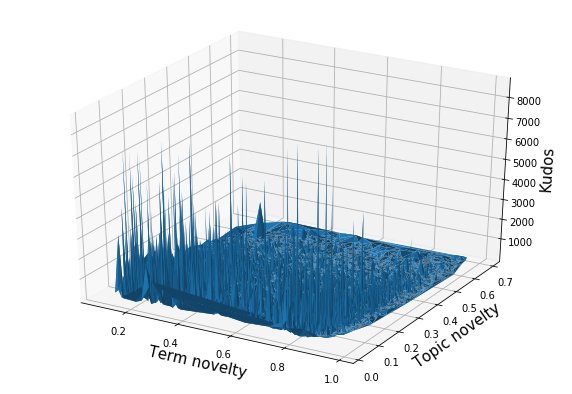

In [19]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(10,7))
ax = fig.gca(projection='3d')
# ax.scatter(, , df_all['Kudos'],lw=0, s=20)
# X, Y = np.meshgrid()
ax.plot_trisurf(df_all['Cos'], df_all['JSD'], df_all['Kudos'], lw=0.2)
ax.set_xlabel('Term novelty', fontsize=15)
ax.set_ylabel('Topic novelty', fontsize=15)
ax.set_zlabel('Kudos', fontsize=15)

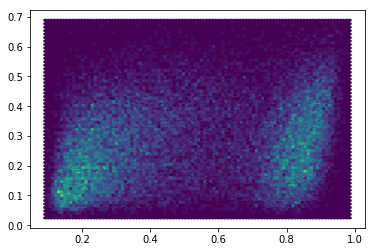

In [13]:
plt.hexbin(df_all['Cos'], df_all['JSD'])

In [45]:
from scipy.stats import pearsonr
pearsonr(df_all['Cos'], df_all['JSD'])

(0.23393616868804235, 0.0)

In [42]:
#Setup some dummy data
hist, binedges = np.histogramdd((np.asarray(df_all['Cos']), np.asarray(df_all['JSD']), \
                                np.asarray(df_all['Kudos'])), normed=False)

Text(0.5, 0, 'Kudos')

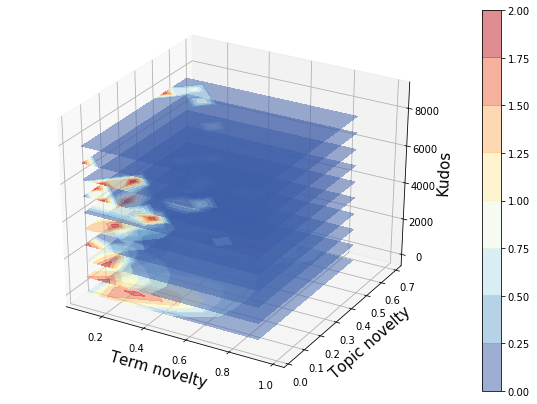

In [44]:
#Setup a 3D figure and plot points as well as a series of slices
fig = plt.figure(figsize=(10,7))
ax1 = fig.add_subplot(111, projection='3d')
ax1.scatter(df_all['Cos'],df_all['JSD'],df_all['Kudos'],alpha=0)
#Use one less than bin edges to give rough bin location
X, Y = np.meshgrid(binedges[0][:-1],binedges[1][:-1])

#Loop over range of slice locations (default histogram uses 10 bins)
for ct in [0,1,2,3,4,5,6,7,8,9]: 
    cs = ax1.contourf(X,Y,hist[:,:,ct], 
                      zdir='z', 
                      offset=binedges[2][ct], 
#                       level=100, 
                      cmap=plt.cm.RdYlBu_r, 
                      alpha=0.5)

# ax1.set_xlim(-3, 3)
# ax1.set_ylim(-3, 3)
# ax1.set_zlim(-3, 3)
plt.colorbar(cs)
ax1.set_xlabel('Term novelty', fontsize=15)
ax1.set_ylabel('Topic novelty', fontsize=15)
ax1.set_zlabel('Kudos', fontsize=15)

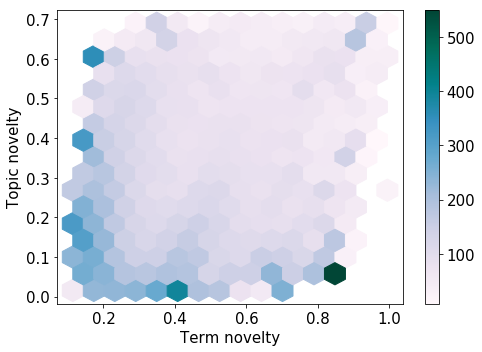

In [22]:
plt.figure(figsize=(7,5))
plt.hexbin(df_all['Cos'], df_all['JSD'], C=df_all['Kudos'], gridsize=15, cmap='PuBuGn')
plt.xlabel('Term novelty', fontsize=15)
plt.ylabel('Topic novelty', fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
cbar = plt.colorbar()
cbar.ax.tick_params(labelsize=15)
plt.tight_layout()
plt.savefig('2d_heatmap.pdf', format='pdf')